# Mielage Prediction-Regression Analysis

# Objective

To create an accurate model to find the mielage of a car. 

# Data Source

This Dataset was taken from the StatLib library which is maitained at Carnegie Mellon University.The dataset was used in the 1983 American Statistical Association Exposition.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

# Describe Data

In [3]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [31]:
df=df.dropna()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Data Preprocessing

In [33]:
df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model_year       13
origin            3
name            301
dtype: int64

# Data Visualization 

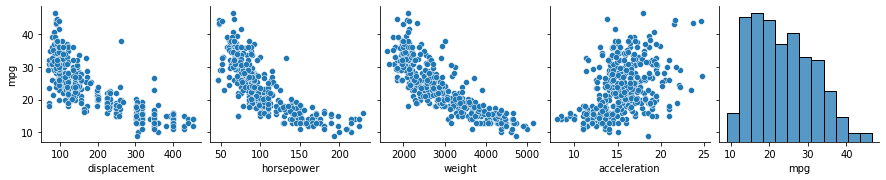

In [34]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

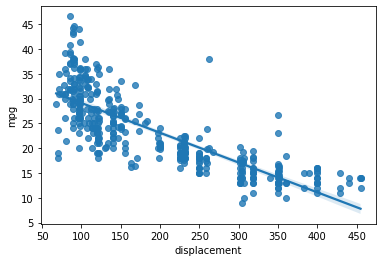

In [35]:
sns.regplot(x='displacement',y='mpg',data=df);
plt.show()

In [36]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [37]:
y=df['mpg']

In [38]:
y.shape

(392,)

In [39]:
x=df[['displacement', 'horsepower', 'weight',
       'acceleration']]

In [40]:
x.shape

(392, 4)

In [41]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
ss=StandardScaler()

In [44]:
x=ss.fit_transform(x)

In [45]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [46]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# Train Test Split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2)

In [49]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

# Linear Regression Model

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr=LinearRegression()

In [52]:
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
lr.intercept_

23.68717643030015

In [54]:
lr.coef_

array([-0.41419139, -1.91349047, -4.48851894, -0.05834076])

# Predict Test Data

In [55]:
y_pred=lr.predict(x_test)

In [57]:
y_pred

array([31.11834172, 28.02167774, 24.34845221, 32.87462716, 29.9147373 ,
       30.13901142, 23.6192627 , 28.48594795, 19.64628505, 18.6016889 ,
       30.44864641, 20.88354024, 30.15418188, 24.13986019, 25.11933121,
       25.63241735, 31.35517323, 17.27959682, 29.36830809, 21.89931311,
       11.03690682, 27.49433036, 26.46666802,  8.89809468, 25.7586993 ,
       21.51314976, 26.14453906, 19.82470673, 12.05711641, 14.21149042,
       26.08849029, 31.94691182, 10.30069391, 15.06848112, 30.90276308,
       29.14581645,  9.50076575, 33.10590055, 27.98175449, 27.74313593,
       29.60379304, 22.51213933, 24.1839695 , 13.67484488, 26.37625725,
       18.130457  , 23.67841697, 23.64650225, 25.92636979, 19.40751947,
       25.23765966, 26.95047794, 12.53276466, 27.95804399, 26.83502163,
       14.56986883, 28.39955243, 30.25887217, 27.09905404, 24.51215147,
       15.26336416, 27.69762186,  6.30955362, 27.05063402, 20.09810465,
       26.69103795, 17.35156984, 12.52727426, 26.86121244, 24.76

# Model Accuracy

In [60]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [61]:
mean_absolute_error(y_test,y_pred)

2.8888974532603564

In [62]:
mean_absolute_percentage_error(y_test,y_pred)

0.13149456173967755

In [63]:
r2_score(y_test,y_pred)

0.7333768763176194

# Polynomial Regression

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [66]:
x_train2=poly.fit_transform(x_train)

In [67]:
x_test2=poly.fit_transform(x_test)

In [69]:
lr.fit(x_train2,y_train)

LinearRegression()

In [70]:
lr.intercept_

21.388804678359925

In [71]:
lr.coef_

array([-2.06335481, -5.66781113, -1.40084307, -0.98070245,  2.07363768,
        0.04552553,  0.66067365,  0.38923723, -0.67970608,  0.34990277])

# Model Accuracy 

In [72]:
y_pred_poly=lr.predict(x_test2)

In [76]:
mean_absolute_error(y_test,y_pred_poly)

2.5370904911777212

In [77]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.11172935803797465

In [78]:
r2_score(y_test,y_pred_poly)

0.7888967650716774

Polynomial regression model gives better accuracy than the normal linear regression model

I found this dataset on github,imported the dataset,applied various preprocessing techniques,did visualization to study the data and finally chose the model which gives pretty good accuracy on this dataset